In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import re

In [3]:
data = pd.read_csv('C:/Users/ASUS/Documents/GitHub/NAACP_summer2021/Entity_Recognition/People_Covered_in_the_News/people_2014.csv')
lemmatizer = WordNetLemmatizer()

In [4]:
def custom_standardization(df):

    spec_chars = ["!",'"',"#","%","&","'","(",")", "*","+",",",
                  "-",".","/",":",";","<", "=",">","?","@","[",
                  "\\","]","^","_", "`","{","|","}","~","–", 
                  "\xc2", "\xa0", "\x80", "\x9c", "\x99", "\x94", 
                  "\xad", "\xe2", "\x9d", "\n", "x9d", "xc2", "xa0", "x80", "x9c", "x99", "x94", 
                  "xad", "xe2"]

    for char in spec_chars:
        df['article'] = df['article'].str.strip()
        df['article'] = df['article'].str.replace(char, ' ')
        df['article'] = df['article'].str.lower()
        
    return df

data = custom_standardization(data)

In [5]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,last_name,article,article_id,race
0,Coakley,coakley suffers from comparison to the campaig...,2014_631,white
1,Ortiz,and none interfered with david ortiz the grea...,2014_1038,hispanic
2,Angela,my prayers go out to the mayor’s loving wife a...,2014_1057,white
3,Angela,i send our prayers to mayor menino’s wife ange...,2014_1057,white
4,Barry,but anecdotally many of those infected use th...,2014_778,white


In [6]:
data.columns = ['last_name', 'sentence', 'article_id', 'race']
data.head()

,last_name,sentence,article_id,race
0,Coakley,coakley suffers from comparison to the campaig...,2014_631,white
1,Ortiz,and none interfered with david ortiz the grea...,2014_1038,hispanic
2,Angela,my prayers go out to the mayor’s loving wife a...,2014_1057,white
3,Angela,i send our prayers to mayor menino’s wife ange...,2014_1057,white
4,Barry,but anecdotally many of those infected use th...,2014_778,white


In [9]:
def remove_names(sent, name_list):
    new_sent = ''
    temp = sent.split()
    for word in temp:
        if word in name_list:
            continue
        else:
            new_sent = new_sent + ' ' + word
    return new_sent.strip()

In [11]:
names = data.last_name.unique()
# TRY AGAIN
c = 0
for name in names:
    data['sentence'] = data.apply(lambda x: remove_names(x['sentence'], names), axis=1)
    print(c)
    c += 1

# doesn't work
# data['sentence'] = remove_names(data['sentence'], names)

KeyboardInterrupt: 

black
Lemmatizing done


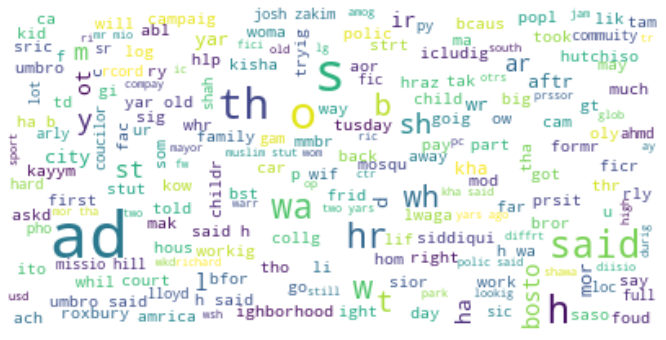

hispanic
Lemmatizing done


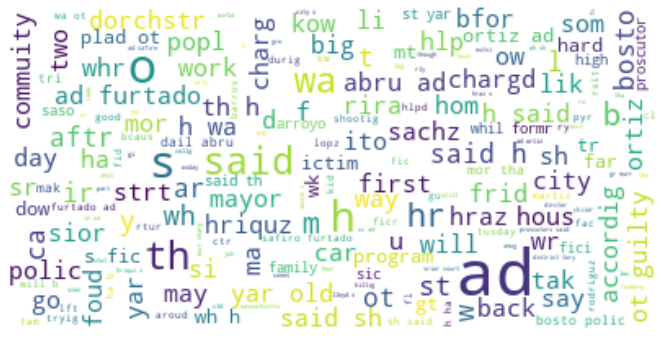

api
Lemmatizing done


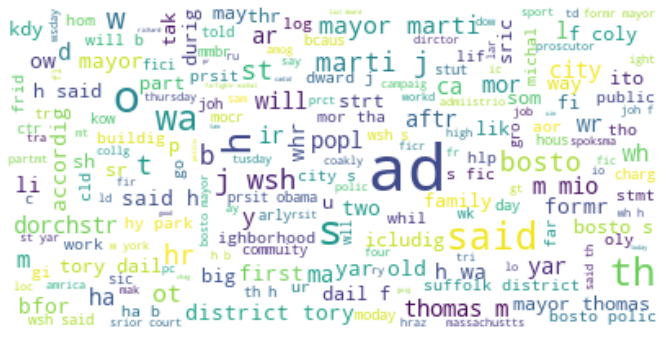

white


KeyboardInterrupt: 

In [17]:
race_groups = data.groupby(data.race)
races = ['black', 'hispanic', 'api', 'white']

for i in range(len(data.race.unique())):
    temp = race_groups.get_group(races[i])
    print(races[i])
    
    documents = ''
    
#    for j in range(len(temp.index)):
#        sent = temp.iloc[j]['sentence']
#        words = sent.split()
#        for word in words:
#            documents = documents + ' ' + lemmatizer.lemmatize(word)
    
    for row in temp.itertuples(index=False):
        words = row.sentence.split()
        for word in words:
            documents = documents + ' ' + lemmatizer.lemmatize(word)
    
    print('Lemmatizing done')
    
    wordcloud = WordCloud(max_font_size=40, background_color='white').generate(documents)
    plt.figure(figsize=(15, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    #plt.savefig('Black_Ents_Clouds/cloud_2018.png')
    wordcloud.to_file('C:/Users/ASUS/Documents/Github/NAACP_summer2021/Entity_Recognition/Most_Common_Words_Diff_Races/2014/' + races[i] + '.png')
    plt.show()

In [ ]:
#len(race_groups.get_group('white'))

In [8]:
#print(i)

1048


In [9]:
#name

'shades'

In [11]:
#list = data.last_name.unique().tolist()
#print(list.index('shades'))

2704


In [12]:
len(list)

4959